In [ ]:
#!pip install bls

In [1]:
import requests
import json
import numpy as np

Find different series codes and names at https://www.bls.gov/help/hlpforma.htm#jt

JTU00000000HIL is the series ID for 'Job openings and labor turnover survey'  <br /> 
JTU00000000JOL is for job openings  <br /> 

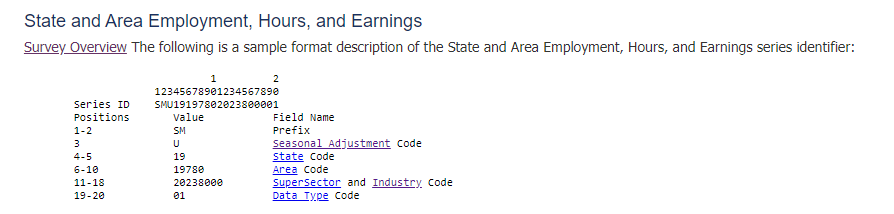

List of industry codes can be found at https://download.bls.gov/pub/time.series/sm/sm.industry  <br /> 
List of state code can be found at https://download.bls.gov/pub/time.series/sm/sm.state  <br /> 
Series ID can be altered using the documentation at https://www.bls.gov/help/def/jt.htm#region  <br /> 

Rate - The job openings rate is computed by dividing the number of job openings by the sum of employment and job openings 
and multiplying that quotient by 100. All other data element rates (hires, total separations, quits, layoffs and discharges,
and other separations) are computed by dividing the data element level by employment and multiplying that quotient by 100

**Industry codes and name**  <br /> 
10000000   ---  Mining and Logging <br /> 
20000000   ---  Construction  <br /> 
30000000   ---  Durable Goods  <br /> 
40000000   ---  Trade, transportation and Utilities  <br /> 
50000000   ---  Information  <br /> 
60000000   ---  Professional and Business Services  <br /> 
70000000   ---  Leisure and Hospitality  <br /> 
80000000   ---  Other Services  (includes repair,maintenance, laundry services, personal care, advocacy, religious orgs..)  <br /> 
90000000   --- Government  <br /> 

source:https://download.bls.gov/pub/time.series/sm/sm.industry

**Region Codes** <br/>
00 -- Total US <br/>

NE -- Northeast: Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, and Vermont <br/>

SO -- South: Alabama, Arkansas, Delaware, District of Columbia, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, and West Virginia <br/>

MW -- Midwest: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, and Wisconsin <br/>

WE -- West: Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, and Wyoming <br/>

Source: https://download.bls.gov/pub/time.series/jt/jt.region

In [234]:
single_digits=np.arange(0, 10, 1).tolist()
single_digits.remove(7)
print(single_digits)

a=[]
for i in single_digits:
    number_str = str(i)
    a.append(number_str)

a

[0, 1, 2, 3, 4, 5, 6, 8, 9]


['0', '1', '2', '3', '4', '5', '6', '8', '9']

In [235]:
state=[]
for i in a:
    zero_filled_number = i.zfill(2)
    state.append(zero_filled_number)
print(state)

b=np.arange(10, 57, 1).tolist()
b.remove(14)
b.remove(43)
b.remove(52)

['00', '01', '02', '03', '04', '05', '06', '08', '09']


In [238]:
for i in b:
    number_str = str(i)
    state.append(number_str)

print(state)

['00', '01', '02', '03', '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56']


In [237]:
from config import APIkey

In [153]:
jsons=[]
codes=['10000000','20000000','30000000','40000000','50000000','60000000','70000000','80000000','90000000']

for industry in codes:
    headers = {'Content-type': 'application/json'}
    data = json.dumps({'seriesid':['SMU1919780'+industry+ '01'],'startyear':'2020','endyear':'2020','registrationkey':APIkey})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    
    series=json_data['Results']['series']
    for s in series:
        seriesID=s['seriesID']
        seriesData=s['data']
        for i in range(len(seriesData)):
            seriesData[i]['seriesID']=seriesID
            print(json.dumps(seriesData,indent=4))
        jsons.append(seriesData)
        
    
    

[
    {
        "year": "2020",
        "period": "M06",
        "periodName": "June",
        "latest": "true",
        "value": "20.6",
        "footnotes": [
            {
                "code": "P",
                "text": "Preliminary"
            }
        ],
        "seriesID": "SMU19197803000000001"
    },
    {
        "year": "2020",
        "period": "M05",
        "periodName": "May",
        "value": "20.1",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M04",
        "periodName": "April",
        "value": "19.8",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M03",
        "periodName": "March",
        "value": "21.1",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M02",
        "periodName": "February",
        "value": "21.1",
        "footnotes": [
            {}
        ]
    },
    {
        "yea

[
    {
        "year": "2020",
        "period": "M06",
        "periodName": "June",
        "latest": "true",
        "value": "6.3",
        "footnotes": [
            {
                "code": "P",
                "text": "Preliminary"
            }
        ],
        "seriesID": "SMU19197805000000001"
    },
    {
        "year": "2020",
        "period": "M05",
        "periodName": "May",
        "value": "6.2",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M04",
        "periodName": "April",
        "value": "6.2",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M03",
        "periodName": "March",
        "value": "6.3",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M02",
        "periodName": "February",
        "value": "6.3",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "

[
    {
        "year": "2020",
        "period": "M06",
        "periodName": "June",
        "latest": "true",
        "value": "28.7",
        "footnotes": [
            {
                "code": "P",
                "text": "Preliminary"
            }
        ],
        "seriesID": "SMU19197807000000001"
    },
    {
        "year": "2020",
        "period": "M05",
        "periodName": "May",
        "value": "20.6",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M04",
        "periodName": "April",
        "value": "17.9",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M03",
        "periodName": "March",
        "value": "35.2",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M02",
        "periodName": "February",
        "value": "34.8",
        "footnotes": [
            {}
        ]
    },
    {
        "yea

[
    {
        "year": "2020",
        "period": "M06",
        "periodName": "June",
        "latest": "true",
        "value": "41.1",
        "footnotes": [
            {
                "code": "P",
                "text": "Preliminary"
            }
        ],
        "seriesID": "SMU19197809000000001"
    },
    {
        "year": "2020",
        "period": "M05",
        "periodName": "May",
        "value": "41.4",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M04",
        "periodName": "April",
        "value": "43.4",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M03",
        "periodName": "March",
        "value": "46.7",
        "footnotes": [
            {}
        ]
    },
    {
        "year": "2020",
        "period": "M02",
        "periodName": "February",
        "value": "46.5",
        "footnotes": [
            {}
        ]
    },
    {
        "yea

In [154]:
jsons=jsons[2:]


In [155]:
import pandas as pd
from pandas import DataFrame


In [156]:
d=[]
for i in jsons:
    #print(i)
    for a in i:
        #print(a)
        d.append(a)

In [157]:
seriesData_df=pd.DataFrame(d)
#seriesData_df=pd.DataFrame(seriesData)

In [159]:
seriesData_df.head(5)

,year,period,periodName,latest,value,footnotes,seriesID
0,2020,M06,June,true,20.6,"[{'code': 'P', 'text': 'Preliminary'}]",SMU19197803000000001
1,2020,M05,May,NaN,20.1,[{}],SMU19197803000000001
2,2020,M04,April,NaN,19.8,[{}],SMU19197803000000001
3,2020,M03,March,NaN,21.1,[{}],SMU19197803000000001
4,2020,M02,February,NaN,21.1,[{}],SMU19197803000000001


In [163]:
clean_df=seriesData_df[["year","periodName","value","seriesID"]]

In [164]:
clean_df

,year,periodName,value,seriesID
0,2020,June,20.6,SMU19197803000000001
1,2020,May,20.1,SMU19197803000000001
2,2020,April,19.8,SMU19197803000000001
3,2020,March,21.1,SMU19197803000000001
4,2020,February,21.1,SMU19197803000000001
5,2020,January,21.1,SMU19197803000000001
6,2020,June,66.0,SMU19197804000000001
7,2020,May,65.6,SMU19197804000000001
8,2020,April,63.9,SMU19197804000000001
9,2020,March,68.2,SMU19197804000000001
